Points 
 [[0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]
H_1 
 [[2.  0.  0. ]
 [0.  2.  0. ]
 [0.3 0.5 1. ]]
H_2
 [[ 0.5        0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]
H_3 
 [[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
H_4 
 [[-1.          1.73205081  0.        ]
 [ 1.73205081  1.          0.        ]
 [-0.3         0.5         1.        ]]


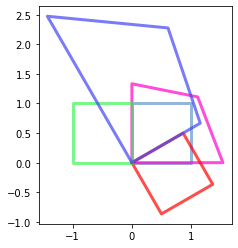

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import string
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1) #In homogenous form
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
P = P/P[-1, :]  #divide by the last row to get inhomogeneous coordinates no use here idk why
P = np.insert(P,4,P[:,0],axis=1) 
x = P[0, :] #first row of P
y = P[1, :] #second row of P
print("Points \n", P) 
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)                                                                     

#Original points                            
ax.plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#First transformation 
H_1 = np.identity(3)
H_1[0,0] = 2
H_1[1,1] = 2
H_1[2, 0] = 0.3
H_1[2, 1] = 0.5
print("H_1 \n",H_1)
Pt_1 = np.matmul(H_1, P)
Pt_1 = Pt_1/Pt_1[-1, :]  #Converting to inhomogeneous coordinates
Pt_1 = np.insert(Pt_1,4,Pt_1[:,0],axis=1) #take the first column and append to the last, so the last point is plotted twice completing the square, omfg
xt_1 = Pt_1[0, :]
yt_1 = Pt_1[1, :]
ax.plot(xt_1, yt_1, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#Second transformation
t = np.pi/3
H_2 = np.array(([np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]))
print("H_2\n",H_2)
Pt_2 = np.matmul(H_2,P) 
Pt_2 = Pt_2/Pt_2[-1, :]
Pt_2 = np.insert(Pt_2,4,Pt_2[:,0],axis=1)  
xt_2 = Pt_2[0, :]
yt_2 = Pt_2[1, :]
ax.plot(xt_2, yt_2, color='#ff0100', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#third transformation
H_3 = np.array(([-1,0,0], [0,1,0], [0., 0., 1.]))
print("H_3 \n",H_3)
Pt_3 = np.matmul(H_3,P)
Pt_3 = Pt_3/Pt_3[-1, :]
Pt_3 = np.insert(Pt_3,4,Pt_3[:,0],axis=1)  
xt_3 = Pt_3[0, :]
yt_3 = Pt_3[1, :]
ax.plot(xt_3, yt_3, color='#42f55a', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#fourth transformation
H_4 = np.matmul(H_2,np.matmul(H_1,H_3))
print("H_4 \n",H_4)
Pt_4 = np.matmul(H_4,P)
Pt_4 = Pt_4/Pt_4[-1, :]
Pt_4 = np.insert(Pt_4,4,Pt_4[:,0],axis=1)  
xt_4 = Pt_4[0, :]
yt_4 = Pt_4[1, :]
ax.plot(xt_4, yt_4, color='#4245f5', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
plt.show()

In [59]:
import cv2 as cv
import numpy as np
im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/assn2/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('images/assn2/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


In [63]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:  
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)

cv.destroyAllWindows()

[[721.  98.]
 [715. 374.]
 [355. 448.]
 [248. 147.]
 [723. 103.]]
[[478.  72.]
 [209. 204.]
 [378. 505.]
 [681. 283.]
 [478.  70.]]
